In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs
X, y = make_blobs(150, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.96, 0.04],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ]])

In [2]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [3]:
categories = ['talk.religion.misc', 'soc.religion.christian','sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

print(train.data[0])
print(train.target[0])

From: jono@mac-ak-24.rtsg.mot.com (Jon Ogden)
Subject: Re: Losing your temper is not a Christian trait
Organization: Motorola LPA Development
Lines: 26

In article <Apr.23.02.55.47.1993.3138@geneva.rutgers.edu>, jcj@tellabs.com
(jcj) wrote:

> I'd like to remind people of the withering of the fig tree and Jesus
> driving the money changers et. al. out of the temple.  I think those
> were two instances of Christ showing anger (as part of His human side).
> 
Yes, and what about Paul saying:

26 Be ye angry, and sin not: let not the sun go down upon your wrath:
(Ephesians 4:26).

Obviously then, we can be angry w/o sinning.

Jon

------------------------------------------------
Jon Ogden         - jono@mac-ak-24.rtsg.mot.com
Motorola Cellular - Advanced Products Division
Voice: 708-632-2521      Data: 708-632-6086
------------------------------------------------

They drew a circle and shut him out.
Heretic, Rebel, a thing to flout.
But Love and I had the wit to win;
We drew a circle and 

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [5]:
model.fit(train.data, train.target)
labels = model.predict(test.data)


Precision score: 0.801676 (micro) / 0.877549 (macro)
Recall score: 0.801676 (micro) / 0.746084 (macro)
F1 score: 0.801676 (micro) / 0.732153 (macro)


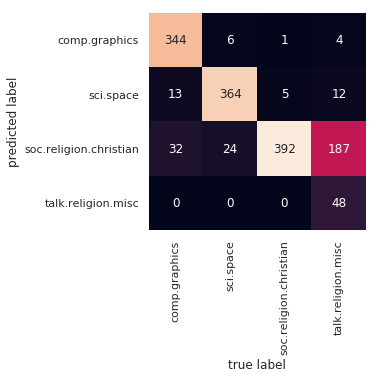

In [6]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
precisions_micro = []
precisions_macro = []
recalls_micro = []
recalls_macro = []
f1s_micro = []
f1s_macro = []
# Compute precision, recall and F1 scores with micro and macro averaging
mlp_precision_micro = precision_score(y_true=test.target, y_pred=labels, average='micro')
mlp_precision_macro = precision_score(y_true=test.target, y_pred=labels, average='macro')
mlp_recall_micro = recall_score(y_true=test.target, y_pred=labels, average='micro')
mlp_recall_macro = recall_score(y_true=test.target, y_pred=labels, average='macro')
mlp_f1_micro = f1_score(y_true=test.target, y_pred=labels, average='micro')
mlp_f1_macro = f1_score(y_true=test.target, y_pred=labels, average='macro')

precisions_micro.append(mlp_precision_micro)
precisions_macro.append(mlp_precision_macro)
recalls_micro.append(mlp_recall_micro)
recalls_macro.append(mlp_recall_macro)
f1s_micro.append(mlp_f1_micro)
f1s_macro.append(mlp_f1_macro)

print('Precision score: %f (micro) / %f (macro)' % (mlp_precision_micro, mlp_precision_macro))
print('Recall score: %f (micro) / %f (macro)' % (mlp_recall_micro, mlp_recall_macro))
print('F1 score: %f (micro) / %f (macro)' % (mlp_f1_micro, mlp_f1_macro))
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');
